# Natural gas commodity futures contracts (NGZ24 and NGZ25)

### Index

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd
import os
import numpy as np

path = r'/content/drive/MyDrive/DataH/data/'
print(os.listdir(path))

data24 = pd.read_csv(path + os.listdir(path)[0], header=6).drop(0)
data25 = pd.read_csv(path + os.listdir(path)[1], header=6).drop(0)

['NGZ24_2020.xlsx - Worksheet.csv', 'NGZ25_2020.xlsx - Worksheet.csv', 'preco_wti.csv']


## Getting crude oil data
API: https://www.eia.gov/opendata/browser/petroleum/pri/spt

In [3]:
import requests

API_KEY = 'peAnFYR5MolC5KRFw7e4lrRJuNu3LynYYGPlIbv0'

url = "https://api.eia.gov/v2/petroleum/pri/spt/data/"

params = {
    "api_key": API_KEY,
    "frequency": "daily",
    "data[0]": "value",
    "facets[series][]": "RWTC",  # WTI - Cushing, Oklahoma
    "start": "2020-01-01",
    "end": "2024-09-27",
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 5000
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    df_oil = pd.DataFrame(data['response']['data'])
else:
    print(f"Request error: {response.status_code}")

df_oil['value'] = df_oil['value'].astype(float)
df_oil['period'] = pd.to_datetime(df_oil['period'])
df_oil = df_oil.rename(columns={'period': 'Date'})
df_oil.to_csv(path + 'preco_wti.csv', index=False)

## Data cleaning and processing

In [4]:
print(df_oil.columns.values,end='\n\n')
print(df_oil['Date'].head(),df_oil['Date'].tail())
print(60*'-')
print(df_oil['value'].describe(),end='\n\n')
print('Nan: ', df_oil['value'].isna().sum())

['Date' 'duoarea' 'area-name' 'product' 'product-name' 'process'
 'process-name' 'series' 'series-description' 'value' 'units']

0   2024-09-27
1   2024-09-26
2   2024-09-25
3   2024-09-24
4   2024-09-23
Name: Date, dtype: datetime64[ns] 1179   2020-01-08
1180   2020-01-07
1181   2020-01-06
1182   2020-01-03
1183   2020-01-02
Name: Date, dtype: datetime64[ns]
------------------------------------------------------------
count    1184.000000
mean       71.228252
std        21.064427
min       -36.980000
25%        61.112500
50%        74.745000
75%        82.815000
max       123.640000
Name: value, dtype: float64

Nan:  0


In [5]:
nan24 = data24.isna().sum()
nan25 = data25.isna().sum()

print(data24.describe(),end='\n\n')
print(nan24, f'\n% of NaN in NGZ24 (volume): {round((100*nan24[2])/data24.shape[0],2)}', end='\n\n')
print(60*'-')
print(data25.describe(),end='\n\n')
print(nan25, f'\n% of NaN in NGZ25 (volume): {round((100*nan25[2])/data25.shape[0],2)}', end='\n\n')

           PX_LAST     PX_VOLUME
count  1192.000000    735.000000
mean      3.615621   4634.251701
std       0.848648   9572.556243
min       2.516000      1.000000
25%       2.779000     44.000000
50%       3.481000    578.000000
75%       4.269500   4402.000000
max       5.627000  73956.000000

Date           0
PX_LAST        0
PX_VOLUME    457
dtype: int64 
% of NaN in NGZ24 (volume): 38.34

------------------------------------------------------------
           PX_LAST    PX_VOLUME
count  1192.000000   533.000000
mean      3.778524   364.848030
std       0.893775   633.970782
min       2.533000     1.000000
25%       2.800500     9.000000
50%       3.961000    63.000000
75%       4.594000   418.000000
max       5.466000  5096.000000

Date           0
PX_LAST        0
PX_VOLUME    659
dtype: int64 
% of NaN in NGZ25 (volume): 55.29



<ipython-input-5-c0593288ff29>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(nan24, f'\n% of NaN in NGZ24 (volume): {round((100*nan24[2])/data24.shape[0],2)}', end='\n\n')
<ipython-input-5-c0593288ff29>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(nan25, f'\n% of NaN in NGZ25 (volume): {round((100*nan25[2])/data25.shape[0],2)}', end='\n\n')


In [6]:
data24.sort_values(by='Date',inplace=True)
data25.sort_values(by='Date',inplace=True)
print("Is 'Date' the same? ", data24['Date'].equals(data25['Date']), end='\n\n')

data24['PX_VOLUME'] = data24['PX_VOLUME'].fillna(0)
data25['PX_VOLUME'] = data25['PX_VOLUME'].fillna(0)
data24['Date'] = pd.to_datetime(data24['Date'])
data25['Date'] = pd.to_datetime(data25['Date'])

print(data24.tail())
print(data25.head())

Is 'Date' the same?  True

        Date  PX_LAST  PX_VOLUME
5 2024-09-18    3.024    47332.0
4 2024-09-19    3.044    50613.0
3 2024-09-20    3.192    61686.0
2 2024-09-23    3.292    73956.0
1 2024-09-24    3.230    54107.0
           Date  PX_LAST  PX_VOLUME
1192 2020-01-02    2.682        0.0
1191 2020-01-03    2.682        0.0
1190 2020-01-06    2.686        0.0
1189 2020-01-07    2.693        0.0
1188 2020-01-08    2.696        0.0


## Data Visualization

### Price

<ipython-input-7-b69cb642ecc2>:11: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  figp.autofmt_xdate()
<ipython-input-7-b69cb642ecc2>:18: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  figp.autofmt_xdate()
<ipython-input-7-b69cb642ecc2>:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


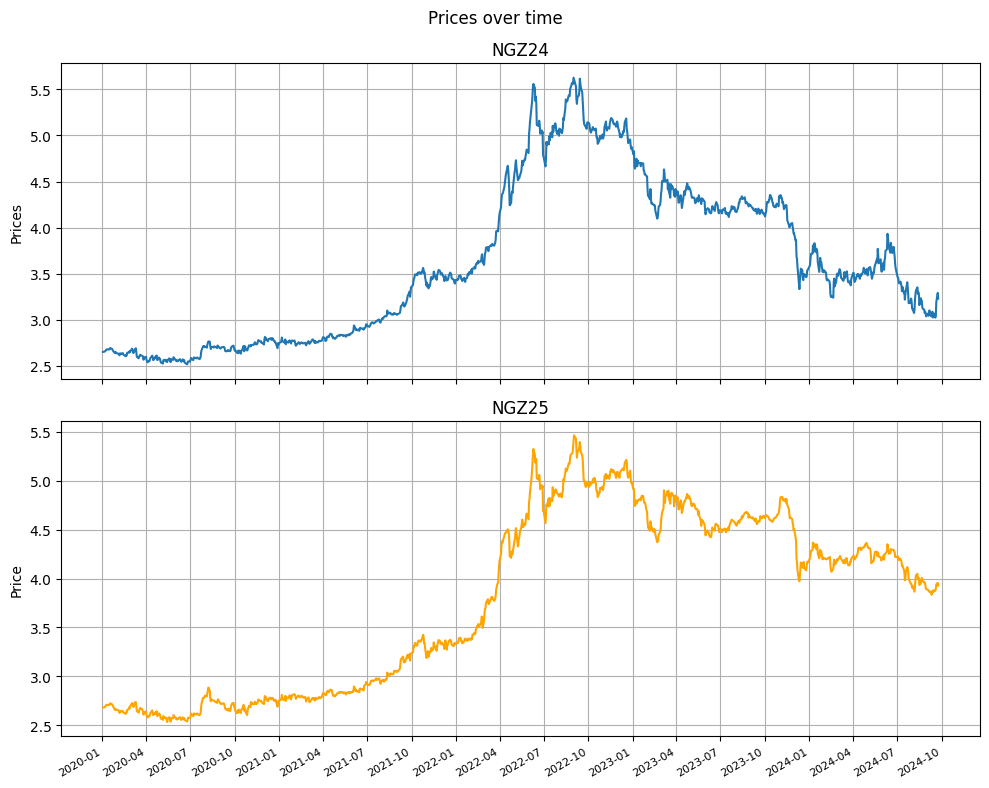

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

figp, (ax1, ax2) = plt.subplots(2, layout='constrained', figsize=(10, 8))
figp.suptitle('Prices over time')

ax1.plot(data24['Date'], data24['PX_LAST'])
ax1.set_title('NGZ24')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.set_ylabel('Prices')
figp.autofmt_xdate()
ax1.grid(True)

ax2.plot(data25['Date'], data25['PX_LAST'], color='orange')
ax2.set_title('NGZ25')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax2.set_ylabel('Price')
figp.autofmt_xdate()
ax2.grid(True)
plt.setp(ax2.xaxis.get_majorticklabels(), fontsize=8)

plt.tight_layout()
plt.show()

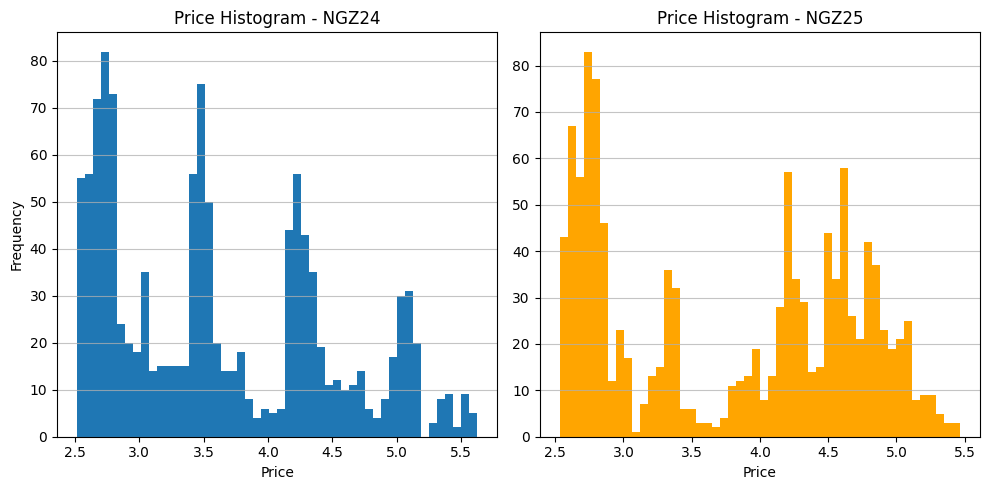

In [8]:
figp2, (ax1, ax2)= plt.subplots(1,2,figsize=(10,5))
ax1.set_title('Price Histogram - NGZ24')
ax1.hist(data24['PX_LAST'], bins= 50)
ax1.grid(axis='y', alpha=0.75)
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')

ax2.set_title('Price Histogram - NGZ25')
ax2.hist(data25['PX_LAST'], bins = 50, color='orange')
ax2.grid(axis='y', alpha=0.75)
ax2.set_xlabel('Price')

plt.tight_layout()
plt.show()

### Spread

<ipython-input-9-b61d0f4c756a>:12: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  figs.autofmt_xdate()


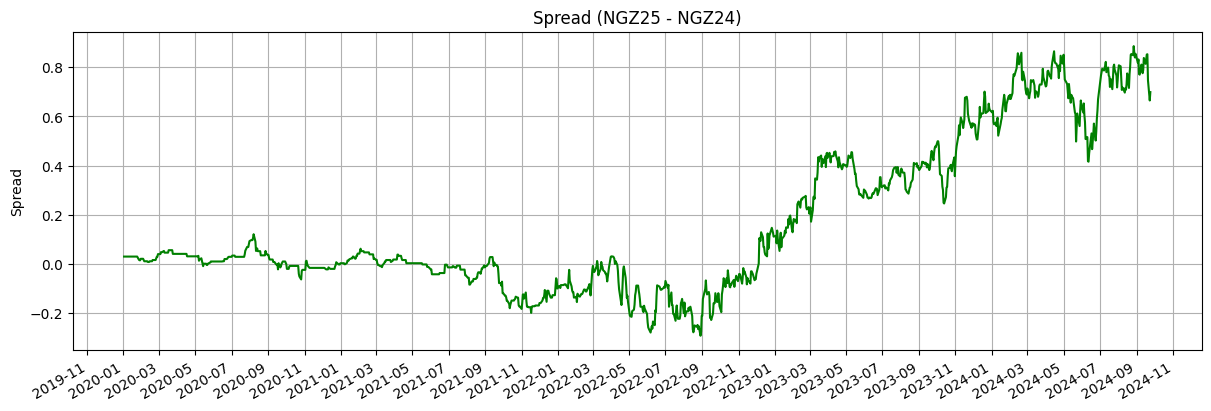

In [9]:
dataSpreadP = pd.DataFrame()
dataSpreadP['PX_LAST'] = data25['PX_LAST'] - data24['PX_LAST']
dataSpreadP['Date'] = data24['Date']

figs = plt.figure(layout='constrained', figsize=(12, 4))
plt.title('Spread (NGZ25 - NGZ24)')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(dataSpreadP['Date'], dataSpreadP['PX_LAST'], color='green')

plt.ylabel('Spread')
figs.autofmt_xdate()
plt.grid(True)
plt.show()

### Volume

<ipython-input-10-7a3ea4048bbd>:20: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  figs.autofmt_xdate()


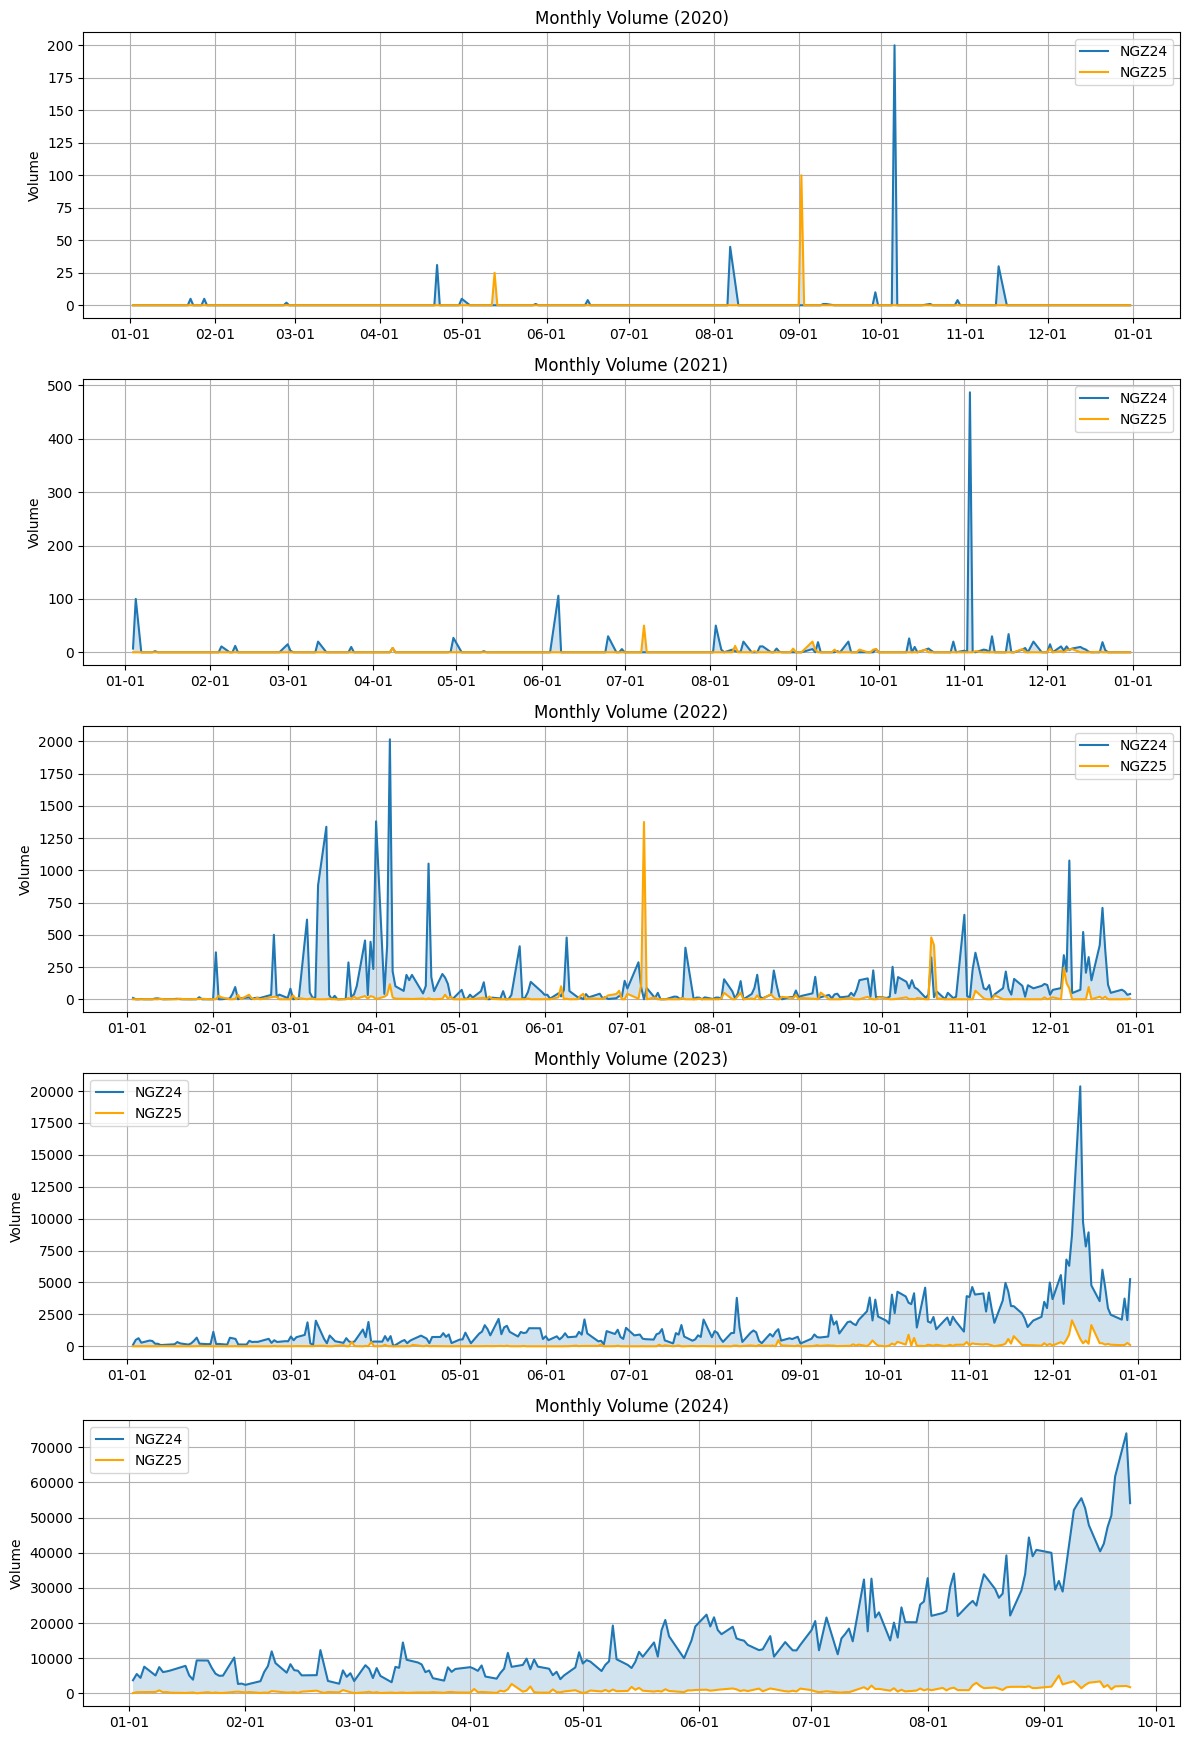

In [10]:
y24 = pd.to_datetime(data24['Date']).dt.year.unique()
y25 = pd.to_datetime(data24['Date']).dt.year.unique()

fig = plt.figure(figsize=(12, 3.5* len(y24)))

for i, ano in enumerate(sorted(y24)):
    plt.subplot(len(y24), 1, i + 1)

    ano_data24 = data24[data24['Date'].dt.year == ano]
    plt.plot(ano_data24['Date'], ano_data24['PX_VOLUME'], label='NGZ24')

    ano_data25 = data25[data25['Date'].dt.year == ano]
    plt.plot(ano_data25['Date'], ano_data25['PX_VOLUME'], color='orange', label='NGZ25')

    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    plt.fill_between(ano_data24['Date'], ano_data25['PX_VOLUME'], ano_data24['PX_VOLUME'], alpha=0.2)

    figs.autofmt_xdate()
    plt.title(f'Monthly Volume ({ano})')
    plt.ylabel('Volume')
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()

### Price volume relationship

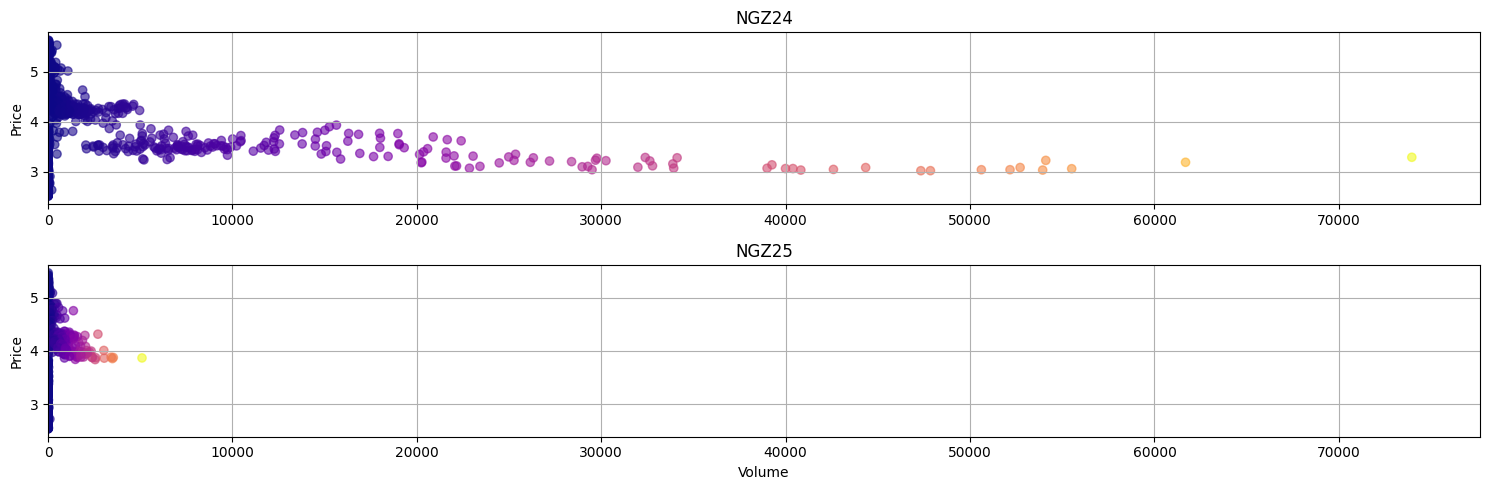

In [11]:
limR= data24['PX_VOLUME'].values.max() + data24['PX_VOLUME'].values.max()*.05
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15, 5 ))

ax1.scatter(x=data24['PX_VOLUME'], y=data24['PX_LAST'], c=data24['PX_VOLUME'], cmap='plasma', alpha=0.6)
ax1.set_xlim(left=0, right=limR)
ax1.set_title('NGZ24')
ax1.set_ylabel('Price')
ax1.grid(True)

ax2.scatter(x=data25['PX_VOLUME'], y=data25['PX_LAST'], c=data25['PX_VOLUME'], cmap='plasma', alpha=0.6)
ax2.set_xlim(left=0, right=limR)
ax2.set_title('NGZ25')
ax2.set_ylabel('Price')
ax2.set_xlabel('Volume')
ax2.grid(True)

plt.tight_layout()
plt.show()

---

## Spread forcasting

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, MaxPooling1D, Dropout
from keras.optimizers import Adam

In [13]:
merged_df = pd.merge(data24, data25, on='Date', suffixes=('_Z24', '_Z25'))
merged_df = pd.merge(merged_df, dataSpreadP, on='Date')

# oil price
df_oil['Date'] = pd.to_datetime(df_oil['Date'])
merged_df = pd.merge(merged_df, df_oil[['Date', 'value']], on='Date', how='inner')
merged_df = merged_df.rename(columns={'value': 'oil_value','PX_LAST':'Spread'})

#price
# percentage variation for both contracts
merged_df['return_Z24'] = merged_df['PX_LAST_Z24'].pct_change()
merged_df['return_Z25'] = merged_df['PX_LAST_Z25'].pct_change()

# 5-day moving average for prices
merged_df['price_ma5_Z24'] = merged_df['PX_LAST_Z24'].rolling(window=5).mean()
merged_df['price_ma5_Z25'] = merged_df['PX_LAST_Z25'].rolling(window=5).mean()
merged_df.columns

array(['Date', 'PX_LAST_Z24', 'PX_VOLUME_Z24', 'PX_LAST_Z25',
       'PX_VOLUME_Z25', 'Spread', 'oil_value', 'return_Z24', 'return_Z25',
       'price_ma5_Z24', 'price_ma5_Z25'], dtype=object)

In [14]:
#volume
# 5-day moving average for volume
merged_df['volume_ma5_Z24'] = merged_df['PX_VOLUME_Z24'].rolling(window=5).mean()
merged_df['volume_ma5_Z25'] = merged_df['PX_VOLUME_Z25'].rolling(window=5).mean()

# Check if volume is above the moving average
merged_df['volume_above_avg_Z24'] = merged_df['PX_VOLUME_Z24'] > merged_df['volume_ma5_Z24']
merged_df['volume_above_avg_Z25'] = merged_df['PX_VOLUME_Z25'] > merged_df['volume_ma5_Z25']

# percentage variation of volume # INF**

In [15]:
print(merged_df.dtypes,end='\n\n')
merged_df['volume_above_avg_Z24'] = merged_df['volume_above_avg_Z24'].astype(int)
merged_df['volume_above_avg_Z25'] = merged_df['volume_above_avg_Z25'].astype(int)
print(merged_df.dtypes)

Date                    datetime64[ns]
PX_LAST_Z24                    float64
PX_VOLUME_Z24                  float64
PX_LAST_Z25                    float64
PX_VOLUME_Z25                  float64
Spread                         float64
oil_value                      float64
return_Z24                     float64
return_Z25                     float64
price_ma5_Z24                  float64
price_ma5_Z25                  float64
volume_ma5_Z24                 float64
volume_ma5_Z25                 float64
volume_above_avg_Z24              bool
volume_above_avg_Z25              bool
dtype: object

Date                    datetime64[ns]
PX_LAST_Z24                    float64
PX_VOLUME_Z24                  float64
PX_LAST_Z25                    float64
PX_VOLUME_Z25                  float64
Spread                         float64
oil_value                      float64
return_Z24                     float64
return_Z25                     float64
price_ma5_Z24                  float64
price_ma5_

In [16]:
merged_df.isna().sum()

,0
Date,0
PX_LAST_Z24,0
PX_VOLUME_Z24,0
PX_LAST_Z25,0
PX_VOLUME_Z25,0
Spread,0
oil_value,0
return_Z24,1
return_Z25,1
price_ma5_Z24,4


In [17]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

merged_df.fillna(0, inplace=True)
print(merged_df.describe())

                                Date  PX_LAST_Z24  PX_VOLUME_Z24  PX_LAST_Z25  PX_VOLUME_Z25       Spread    oil_value   return_Z24   return_Z25  price_ma5_Z24  price_ma5_Z25  volume_ma5_Z24  volume_ma5_Z25  volume_above_avg_Z24  volume_above_avg_Z25
count                           1181  1181.000000    1181.000000  1181.000000    1181.000000  1181.000000  1181.000000  1181.000000  1181.000000    1181.000000    1181.000000     1181.000000     1181.000000           1181.000000           1181.000000
mean   2022-05-11 06:49:41.202370816     3.612522    2863.642676     3.774360     163.635055     0.161838    71.233556     0.000227     0.000362       3.602570       3.763149     2759.954107      160.465030              0.303133              0.235394
min              2020-01-02 00:00:00     2.516000       0.000000     2.533000       0.000000    -0.292000   -36.980000    -0.049802    -0.051536       0.000000       0.000000        0.000000        0.000000              0.000000              0.000

In [18]:
X = np.array(merged_df.drop(['Date','Spread'],axis=1))
y = np.array(merged_df['Spread'])

scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y.reshape(y.shape[0], 1))

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2)

for i in [x_train, x_test, y_train, y_test]:
  print(i.shape)


(944, 13)
(237, 13)
(944, 1)
(237, 1)


#### Model



In [19]:
time_step = X.shape[1]

def lstm():
  model = Sequential()
  model.add(LSTM(128, return_sequences=True, input_shape=(time_step, 1)))
  model.add(LSTM(64, input_shape=(time_step, 1)))
  #model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(.35))
  model.add(Dense(128))
  model.add(Dense(128))
  model.add(Dense(64))
  model.add(Dense(64))
  model.add(Dense(1))
  model.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error')

  return model

In [20]:
model = lstm()
model.fit(x_train,y_train, epochs=50, batch_size=int(x_train.shape[0]*.1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.1095
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0496
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0364
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 0.0300
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 0.0246
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - loss: 0.0195
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0170
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0169
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0134
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0106
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0117
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0111
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0104
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0106
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0092

In [21]:
predict = model.predict(x_test)

predict = scaler.inverse_transform(predict)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


In [22]:
mean_squared_error(y_test, predict)

0.004951075697960168

In [23]:
tolerance = np.std(merged_df['Spread']) * .5
diff = np.abs(y_test - predict)

# num_pred error within tolerance
correct = np.sum(diff < tolerance)

acc = correct / len(y_test) * 100

print(f'Aapproximate accuracy: {round(acc,3)}%')

Aapproximate accuracy: 96.624%


---

### Spread forecast for the next 5 days

In [24]:
last_sequence = x_test[-1:] #last window
future_predictions = []

for _ in range(5):
    predicted_value = model.predict(last_sequence, verbose=None
                                    )
    predicted_value = scaler.inverse_transform(predicted_value)
    future_predictions.append(predicted_value)

    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1] = scaler.inverse_transform(predicted_value)[0][0]

future_predictions = np.array(future_predictions).reshape(-1, 1)

print("Next five days forecasting:\n")
next_5_df = pd.DataFrame(future_predictions, columns=['Spread'], index=pd.date_range(start=merged_df['Date'].iloc[-1], periods=5, freq='D'))
next_5_df

Next five days forecasting:



,Spread
2024-09-24,-0.075475
2024-09-25,-0.044552
2024-09-26,-0.019565
2024-09-27,0.004843
2024-09-28,0.023497


---

### Volumes outside the average

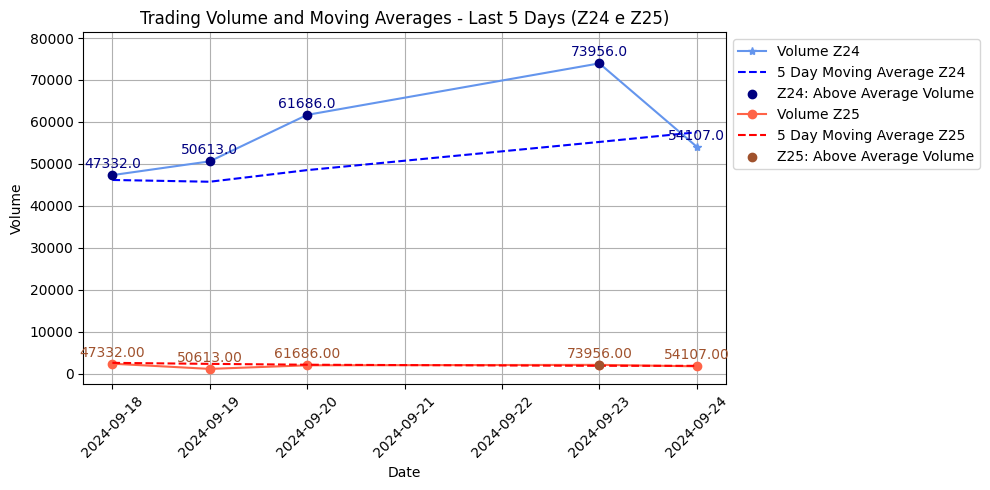

In [25]:
last_5_days = merged_df.tail(5)
lim = last_5_days['PX_VOLUME_Z24'].max() + last_5_days['PX_VOLUME_Z24'].max()*.1

plt.figure(figsize=(10, 5))

#Vol Z24
plt.plot(last_5_days['Date'], last_5_days['PX_VOLUME_Z24'], label='Volume Z24', marker='*', color='cornflowerblue')
plt.plot(last_5_days['Date'], last_5_days['volume_ma5_Z24'], label='5 Day Moving Average Z24', linestyle='--', color='blue')
#vol above avg Z24
plt.scatter(last_5_days['Date'][last_5_days['volume_above_avg_Z24'] > 0],
            last_5_days['PX_VOLUME_Z24'][last_5_days['volume_above_avg_Z24'] > 0],
            color='navy', label='Z24: Above Average Volume', zorder=5)

#Vol Z25
plt.plot(last_5_days['Date'], last_5_days['PX_VOLUME_Z25'], label='Volume Z25', marker='o', color='tomato')
plt.plot(last_5_days['Date'], last_5_days['volume_ma5_Z25'], label='5 Day Moving Average Z25', linestyle='--', color='red', )
#vol above avg Z25
plt.scatter(last_5_days['Date'][last_5_days['volume_above_avg_Z25'] > 0],
            last_5_days['PX_VOLUME_Z25'][last_5_days['volume_above_avg_Z25'] > 0],
            color='sienna', label='Z25: Above Average Volume', zorder=5)

for index, row in last_5_days.iterrows():
    plt.annotate(f"{row['PX_VOLUME_Z24']:.2f}", (row['Date'], row['PX_VOLUME_Z25']),
                 textcoords="offset points", xytext=(0, 5), ha='center', color='sienna')

    plt.annotate(f"{row['PX_VOLUME_Z24']}", (row['Date'], row['PX_VOLUME_Z24']),#:.2f
                 textcoords="offset points", xytext=(0, 5), ha='center', color='navy')

plt.title('Trading Volume and Moving Averages - Last 5 Days (Z24 e Z25)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.ylim(top = lim)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.grid()
plt.show()


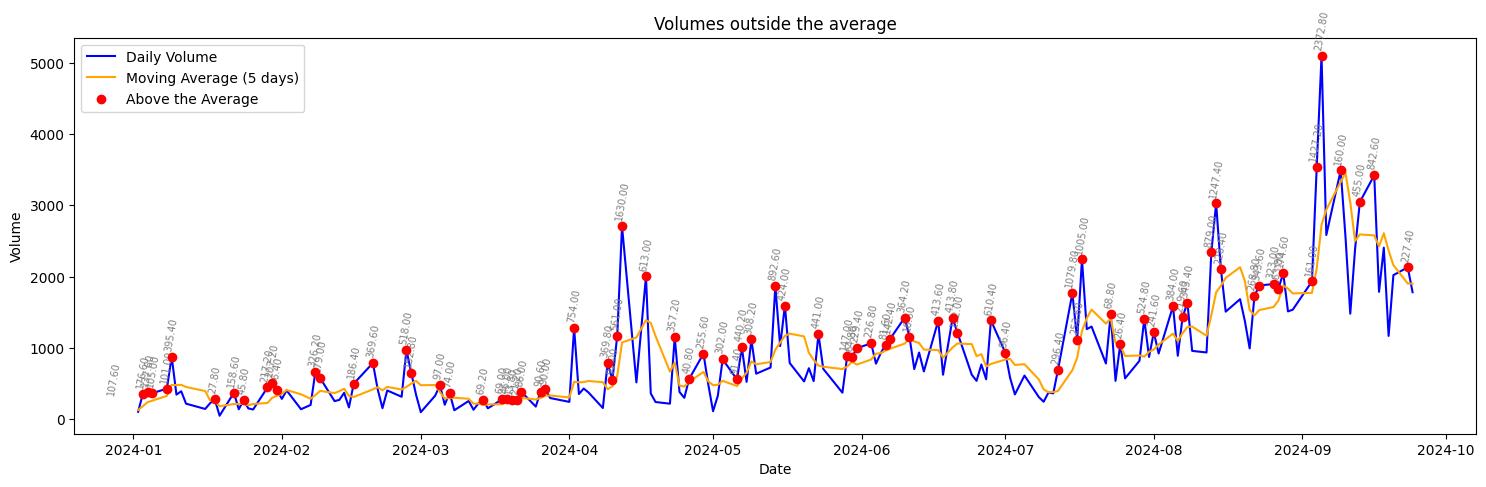

In [27]:
#5 days moving avg
merged_df['VolumeZ25_MA_5'] = merged_df['PX_VOLUME_Z25'].rolling(window=5).mean()

merged_df['Above_AverageZ25'] = merged_df['PX_VOLUME_Z25'] - merged_df['VolumeZ25_MA_5']

above_average_days = merged_df[merged_df['Above_AverageZ25'] > 0]

for y in [2024]: #check more years here
  d = merged_df['Date'][merged_df['Date'].dt.year == y]

  plt.figure(figsize=(15, 5)).autofmt_xdate()
  plt.plot(d, merged_df['PX_VOLUME_Z25'][merged_df['Date'].dt.year == y], label='Daily Volume', color='blue')
  plt.plot(d, merged_df['VolumeZ25_MA_5'][merged_df['Date'].dt.year == y], label='Moving Average (5 days)', color='orange')
  plt.scatter(above_average_days['Date'][above_average_days['Date'].dt.year == y], above_average_days['PX_VOLUME_Z25'][above_average_days['Date'].dt.year == y], color='red', label='Above the Average', zorder=5)

  #Anotations
  for index, row in above_average_days.iterrows():
      plt.annotate(f"{row['Above_AverageZ25']:.2f}", (row['Date'], row['PX_VOLUME_Z25']),
                  textcoords="offset points", xytext=(0, 5), ha='center', color='grey', fontsize=7, rotation=80)


  plt.title('Volumes outside the average')
  plt.xlabel('Date')
  plt.ylabel('Volume')
  plt.legend()
  plt.tight_layout()
  plt.show()



---


### Assets that go in opposite directions

In [30]:
merged_df['Price_NGZ24_change'] = merged_df['PX_LAST_Z24'].diff()
merged_df['Price_NGZ25_change'] = merged_df['PX_LAST_Z25'].diff()

merged_df['Opposite_Direction'] = (
    (merged_df['Price_NGZ24_change'] > 0) & (merged_df['Price_NGZ25_change'] < 0) |
    (merged_df['Price_NGZ24_change'] < 0) & (merged_df['Price_NGZ25_change'] > 0)
)

opposite_days = merged_df[merged_df['Opposite_Direction']]
opposite_days[['Date', 'PX_LAST_Z24','Price_NGZ24_change', 'PX_LAST_Z25', 'Price_NGZ25_change']]

,Date,PX_LAST_Z24,Price_NGZ24_change,PX_LAST_Z25,Price_NGZ25_change
22,2020-02-04,2.633,0.001,2.649,-0.004
36,2020-02-25,2.643,-0.004,2.666,0.003
87,2020-05-07,2.563,0.002,2.576,-0.018
145,2020-07-30,2.703,-0.011,2.785,0.002
156,2020-08-14,2.705,0.002,2.757,-0.009
...,...,...,...,...,...
1161,2024-08-27,3.076,-0.034,3.962,0.003
1162,2024-08-28,3.087,0.011,3.945,-0.017
1165,2024-09-03,3.067,0.030,3.885,-0.007
1167,2024-09-05,3.094,0.050,3.867,-0.009


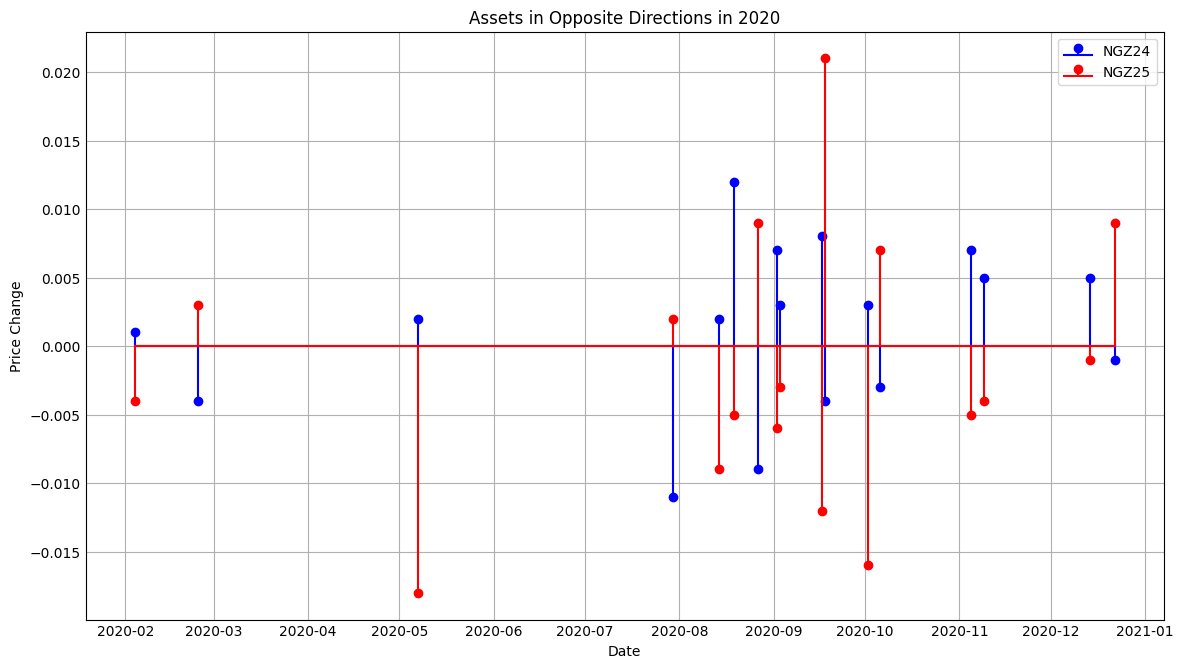

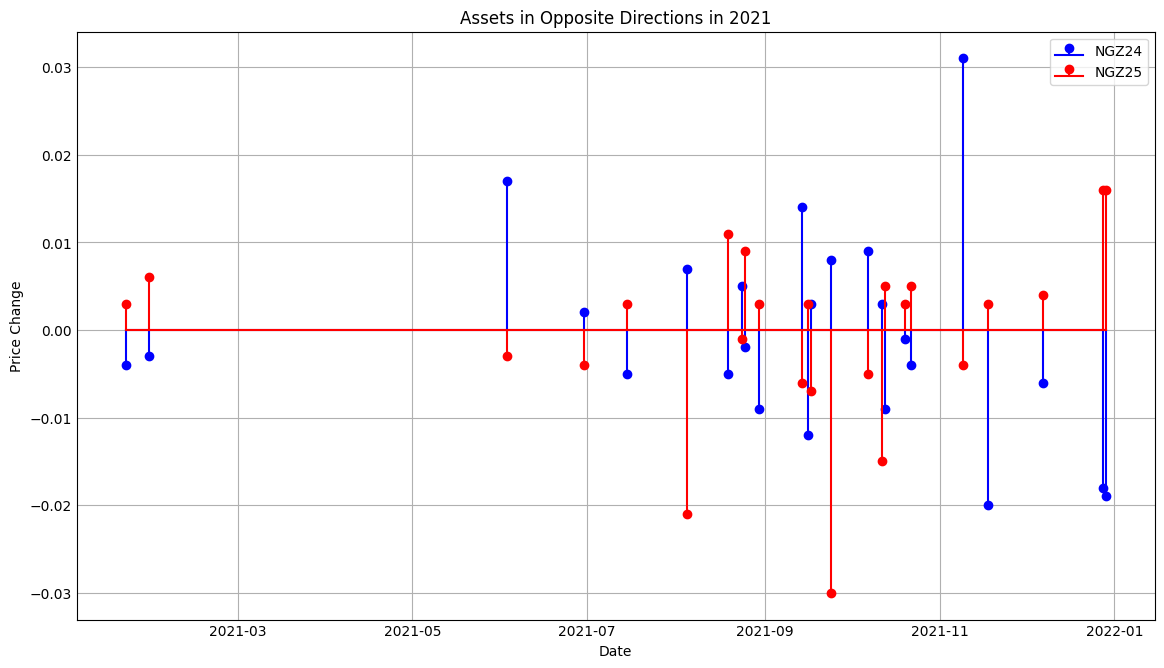

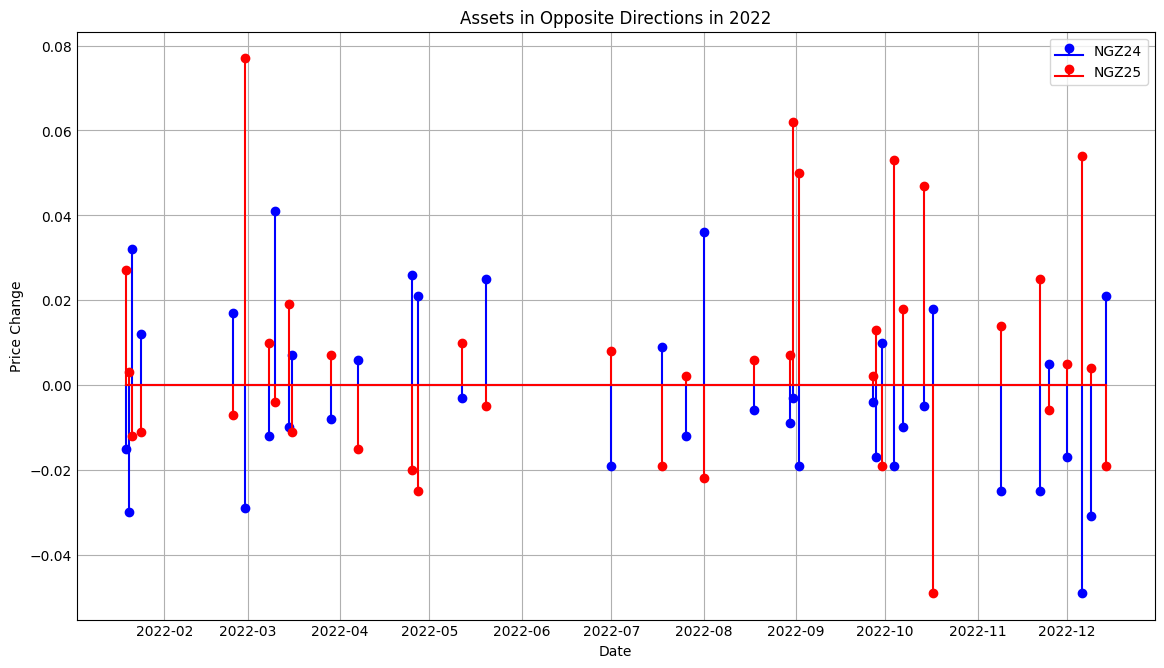

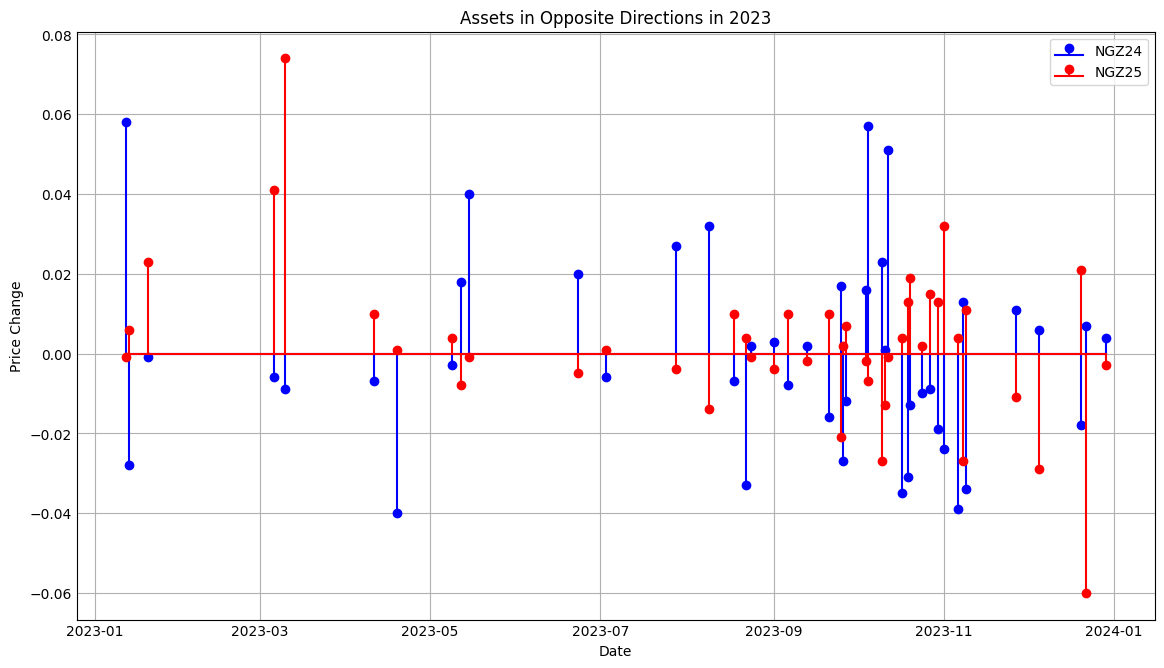

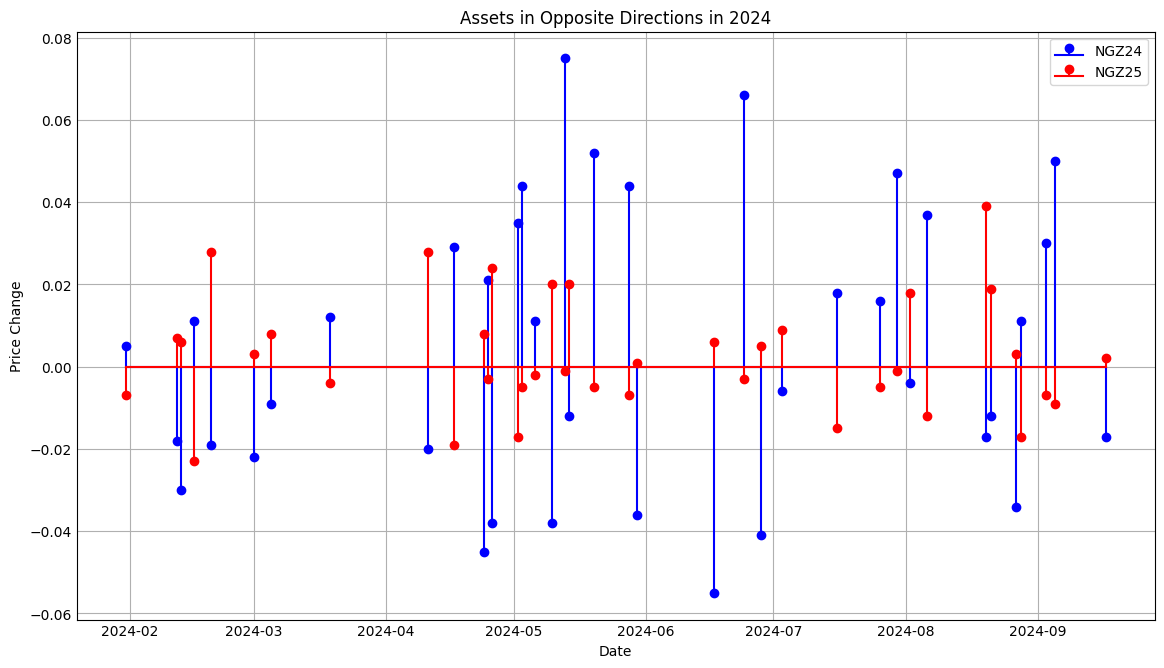

In [29]:
plt.style.use('_mpl-gallery')
for y in opposite_days['Date'].dt.year.unique():
  fig, ax = plt.subplots(figsize=(11, 6))
  ax.stem(opposite_days['Date'][opposite_days['Date'].dt.year==y], opposite_days['Price_NGZ24_change'][opposite_days['Date'].dt.year==y], label='NGZ24', linefmt='b-', basefmt='b-')
  ax.stem(opposite_days['Date'][opposite_days['Date'].dt.year==y], opposite_days['Price_NGZ25_change'][opposite_days['Date'].dt.year==y], label='NGZ25', linefmt='r-', basefmt='r-')
  plt.title(f'Assets in Opposite Directions in {y}')
  plt.xlabel('Date')
  plt.ylabel('Price Change')
  plt.legend()
  plt.grid(True)
  plt.show()